In [181]:
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
# Read in the data and clean it up
df = pd.DataFrame()
dfs = []
sample_types = ['plant', 'rock', 'water']

for sample_type in sample_types:
    sample_df = pd.read_csv(f'{sample_type}.csv').set_index('Sample').transpose()
    sample_df['Sample type'] = sample_type
    dfs.append(sample_df)

for i in range(1, len(dfs)):
    dfs[i].columns = dfs[0].columns
df_groupie = pd.concat(dfs, keys=sample_types, names=['Sample type', 'Sample name'])
df = pd.concat(dfs)

In [183]:
display(df)

Sample,ppb Pb,206Pb/204Pb,± (2s),206Pb/207Pb,± (2s),206Pb/208Pb,± (2s),87Sr/86Sr,± (2s),ppb Sr,Sample type
ML 24-01,5.060,18.69,0.03,1.194,0.001,0.4858,0.0009,0.708889,0.00002,748.9,plant
ML 24-02,1.830,18.58,0.03,1.187,0.001,0.4845,0.0009,0.708955,0.00002,665.7,plant
ML 24-03,0.190,18.44,0.03,1.180,0.001,0.4833,0.0009,0.716575,0.00002,14.5,plant
WT 24-04,4.700,19.11,0.03,1.219,0.001,0.4893,0.0009,0.708392,0.00002,753.0,plant
WT 24-05,0.940,18.47,0.03,1.177,0.001,0.4821,0.0009,0.709862,0.00002,33.7,plant
LL 24-08,1.330,19.00,0.06,1.206,0.001,0.4890,0.0009,0.708571,0.00002,228.1,plant
LL 24-10,37.000,18.79,0.03,1.199,0.001,0.4844,0.0009,0.706651,0.00002,1641.7,plant
HL 24-11,1.240,18.49,0.04,1.183,0.001,0.4835,0.0009,0.707853,0.00002,495.2,plant
HL 24-12,2.030,18.71,0.03,1.195,0.001,0.4863,0.0009,0.707936,0.00002,7.0,plant
RS 24-13,1.010,18.65,0.04,1.190,0.001,0.4864,0.0009,0.718928,0.00002,5292.6,plant


In [184]:
grouped_by_location = df_groupie.groupby(by=lambda name: name[:2], level='Sample name')

In [185]:
import seaborn as sns

In [186]:
# Reset the index to use the groupby keys as a column
df_reset = df.reset_index()

df_reset

Sample,index,ppb Pb,206Pb/204Pb,± (2s),206Pb/207Pb,± (2s),206Pb/208Pb,± (2s),87Sr/86Sr,± (2s),ppb Sr,Sample type
0,ML 24-01,5.060,18.69,0.03,1.194,0.001,0.4858,0.0009,0.708889,0.00002,748.9,plant
1,ML 24-02,1.830,18.58,0.03,1.187,0.001,0.4845,0.0009,0.708955,0.00002,665.7,plant
2,ML 24-03,0.190,18.44,0.03,1.180,0.001,0.4833,0.0009,0.716575,0.00002,14.5,plant
3,WT 24-04,4.700,19.11,0.03,1.219,0.001,0.4893,0.0009,0.708392,0.00002,753.0,plant
4,WT 24-05,0.940,18.47,0.03,1.177,0.001,0.4821,0.0009,0.709862,0.00002,33.7,plant
5,LL 24-08,1.330,19.00,0.06,1.206,0.001,0.4890,0.0009,0.708571,0.00002,228.1,plant
6,LL 24-10,37.000,18.79,0.03,1.199,0.001,0.4844,0.0009,0.706651,0.00002,1641.7,plant
7,HL 24-11,1.240,18.49,0.04,1.183,0.001,0.4835,0.0009,0.707853,0.00002,495.2,plant
8,HL 24-12,2.030,18.71,0.03,1.195,0.001,0.4863,0.0009,0.707936,0.00002,7.0,plant
9,RS 24-13,1.010,18.65,0.04,1.190,0.001,0.4864,0.0009,0.718928,0.00002,5292.6,plant


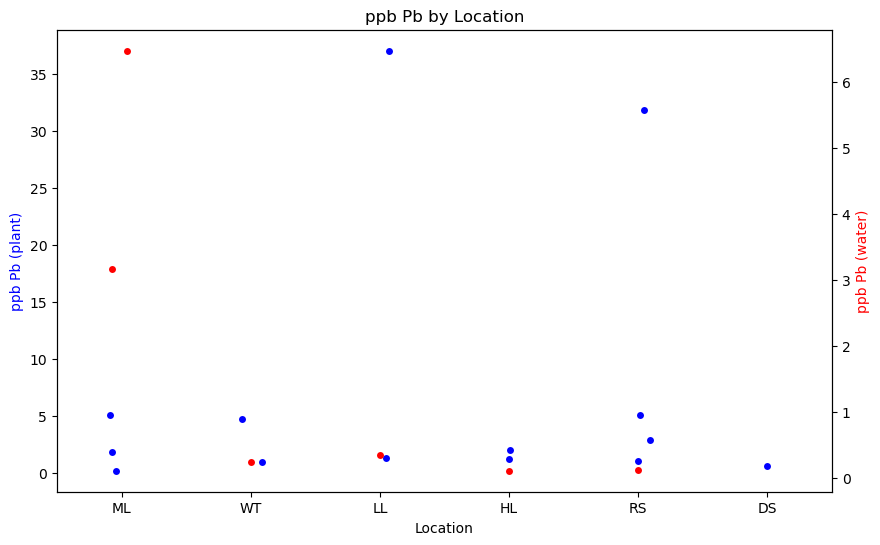

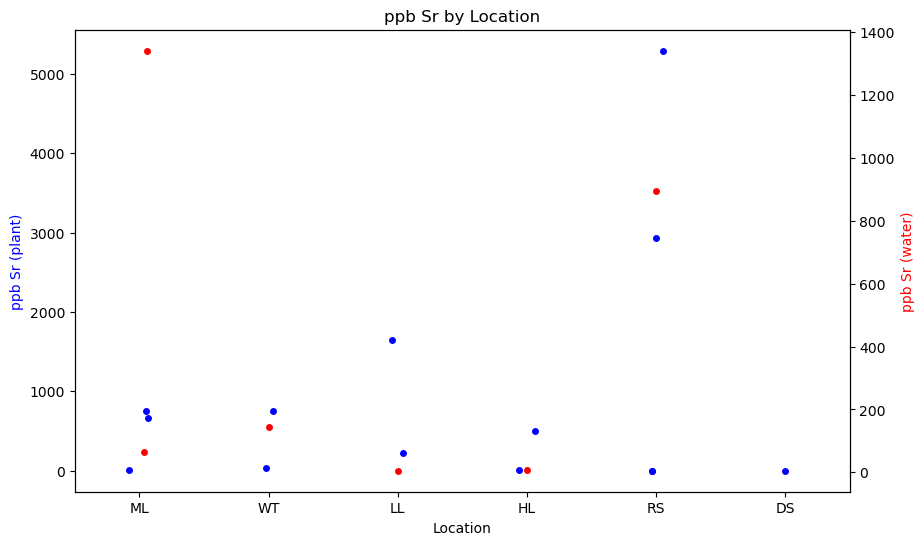

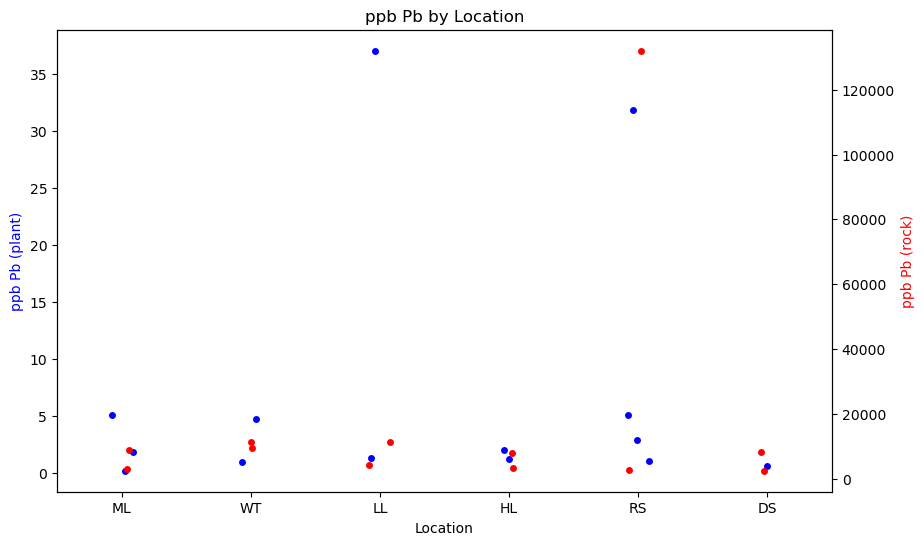

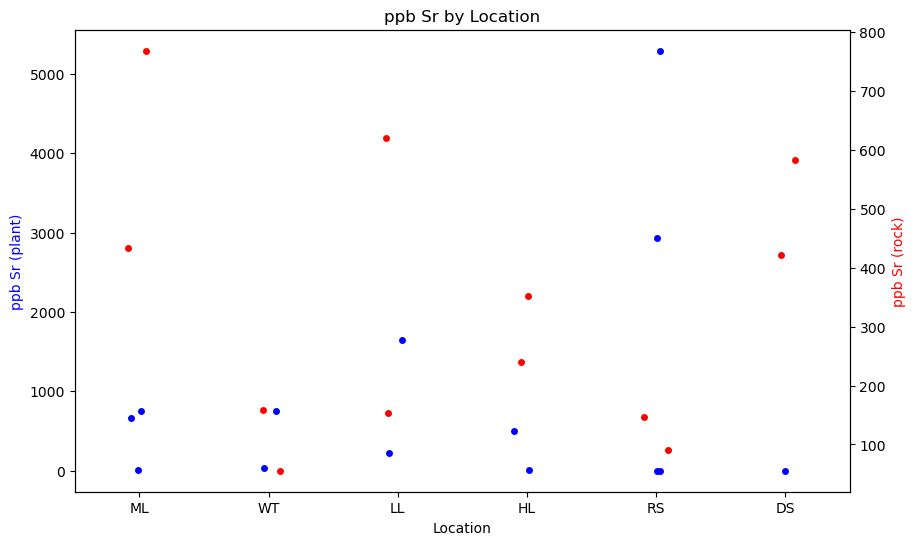

In [187]:
# Extract the location from the 'Sample name' for the x-axis
df_reset['Location'] = df_reset['index'].str[:2]

# Create the strip plots
for secondary in ['water', 'rock']:
    for metal in ['Pb', 'Sr']:
        fig = plt.figure(figsize=(10, 6))
        ax1 = sns.stripplot(x='Location', y=f'ppb {metal}', data=df_reset[df_reset['Sample type'] == 'plant'], jitter=True, color='blue')
        ax2 = ax1.twinx()
        sns.stripplot(x='Location', y=f'ppb {metal}', data=df_reset[df_reset['Sample type'] == f'{secondary}'], jitter=True, color='red', ax=ax2)
        ax1.set_ylabel(f'ppb {metal} (plant)', color='blue')
        ax2.set_ylabel(f'ppb {metal} ({secondary})', color='red')
        plt.title(f'ppb {metal} by Location')
        plt.xlabel('Location')
        plt.show()

In [ ]:
from scipy.stats import spearmanr
stats = pd.DataFrame()
for secondary in ['water', 'rock']:
    for metal in ['Pb', 'Sr']:
        avg_levels = df_reset.groupby(['Location', 'Sample type'])[f'ppb {metal}'].mean().unstack()
        if secondary == 'water':
            avg_levels = avg_levels.dropna()
        correlation, p_value = spearmanr(avg_levels[f'{secondary}'], avg_levels['plant'])
        stats = pd.concat([stats, pd.DataFrame([{'metal': metal, 'secondary': secondary, 'correlation': correlation, 'p_value': p_value}])])

0.3 0.6238376647810728
0.39999999999999997 0.5046315754686911
0.8285714285714287 0.04156268221574334
-0.2 0.704


In [189]:
stats

,metal,secondary,correlation,p_value
0,Pb,water,0.300000,0.623838
0,Sr,water,0.400000,0.504632
0,Pb,rock,0.828571,0.041563
0,Sr,rock,-0.200000,0.704000
